In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [38]:
#Load THE DATA
df=pd.read_csv('D:/DataScience/DATA ANALYTICS/blinkIT/BlinkIT Grocery Data (1).csv')

In [39]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857
std,3.189396,0.051598,4.643456,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,8.773750,93.826500,4.000000
50%,2016.000000,0.053931,12.600000,143.012800,4.000000
75%,2018.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [9]:
df.describe(include='object')

,Item Fat Content,Item Identifier,Item Type,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type
count,8523,8523,8523,8523,8523,8523,8523
unique,5,1559,16,10,3,3,4
top,Low Fat,FDG33,Fruits and Vegetables,OUT027,Tier 3,Medium,Supermarket Type1
freq,5089,10,1232,935,3350,3631,5577


In [10]:
numerical_cols=df.select_dtypes(include=[np.number]).columns.to_list()
categorical_cols=df.select_dtypes(include='object').columns.to_list()
print('Numerical columns:',numerical_cols)
print('Categorical columns:',categorical_cols)

Numerical columns: ['Outlet Establishment Year', 'Item Visibility', 'Item Weight', 'Sales', 'Rating']
Categorical columns: ['Item Fat Content', 'Item Identifier', 'Item Type', 'Outlet Identifier', 'Outlet Location Type', 'Outlet Size', 'Outlet Type']


In [47]:
for col in categorical_cols:
    print('total : ',df[col].nunique())
    print(col,df[col].unique())
    print('----------------------')


total :  2
Item Fat Content ['Regular' 'Low Fat']
----------------------
total :  1559
Item Identifier ['FDX32' 'NCB42' 'FDR28' ... 'FDU60' 'NCX53' 'FDE52']
----------------------
total :  16
Item Type ['Fruits and Vegetables' 'Health and Hygiene' 'Frozen Foods' 'Canned'
 'Soft Drinks' 'Household' 'Snack Foods' 'Meat' 'Breads' 'Hard Drinks'
 'Others' 'Dairy' 'Breakfast' 'Baking Goods' 'Seafood' 'Starchy Foods']
----------------------
total :  10
Outlet Identifier ['OUT049' 'OUT018' 'OUT046' 'OUT013' 'OUT045' 'OUT017' 'OUT010' 'OUT027'
 'OUT035' 'OUT019']
----------------------
total :  3
Outlet Location Type ['Tier 1' 'Tier 3' 'Tier 2']
----------------------
total :  3
Outlet Size ['Medium' 'Small' 'High']
----------------------
total :  4
Outlet Type ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
----------------------


### DATA CLEANING

##### Handling missing values

*Used product-based imputation for missing values to preserve data consistency.

In [40]:
df1=df.copy()

In [41]:
# Step 1: Fill by Item Identifier
df1['Item Weight'] = df1.groupby('Item Identifier')['Item Weight'].transform(lambda x: x.fillna(x.mean()))

# Step 2: Fill remaining nulls by Item Type
df1['Item Weight'] = df1.groupby('Item Type')['Item Weight'].transform(lambda x: x.fillna(x.mean()))


In [42]:
df1.isnull().sum()

Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64

##### CREATE NEW COLUMNS

In [54]:
 #Convert Outlet Establishment Year → Outlet Age
df1['Outlet Age'] = 2021 - df1['Outlet Establishment Year']

#### Standardize Categorical Columns

In [43]:
print(df1['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [44]:
df1['Item Fat Content']=df1['Item Fat Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

In [45]:
print(df1['Item Fat Content'].unique())


['Regular' 'Low Fat']


#### outiers check

In [46]:
def plot_box_hist(df1, column_name, bins=30, color_box='skyblue', color_hist='salmon'):

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Boxplot
    sns.boxplot(y=df1[column_name], ax=axes[0], color=color_box)
    axes[0].set_title(f'Boxplot of {column_name}')

    # Histplot
    sns.histplot(df1[column_name], bins=bins, kde=True, ax=axes[1], color=color_hist)
    axes[1].set_title(f'Distribution of {column_name}')

    plt.tight_layout()
    plt.show()


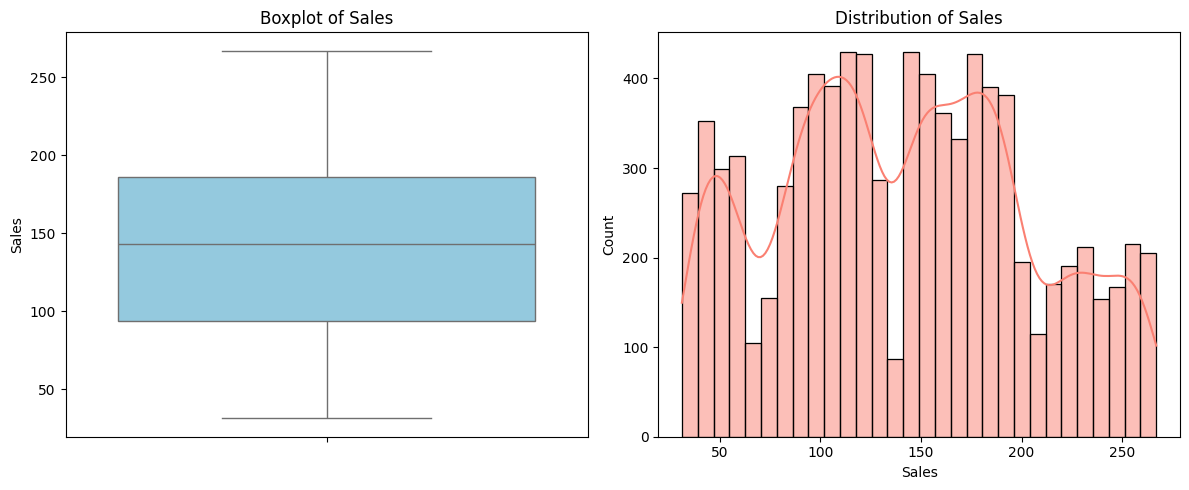

In [47]:
plot_box_hist(df1, 'Sales', bins=30, color_box='skyblue', color_hist='salmon')

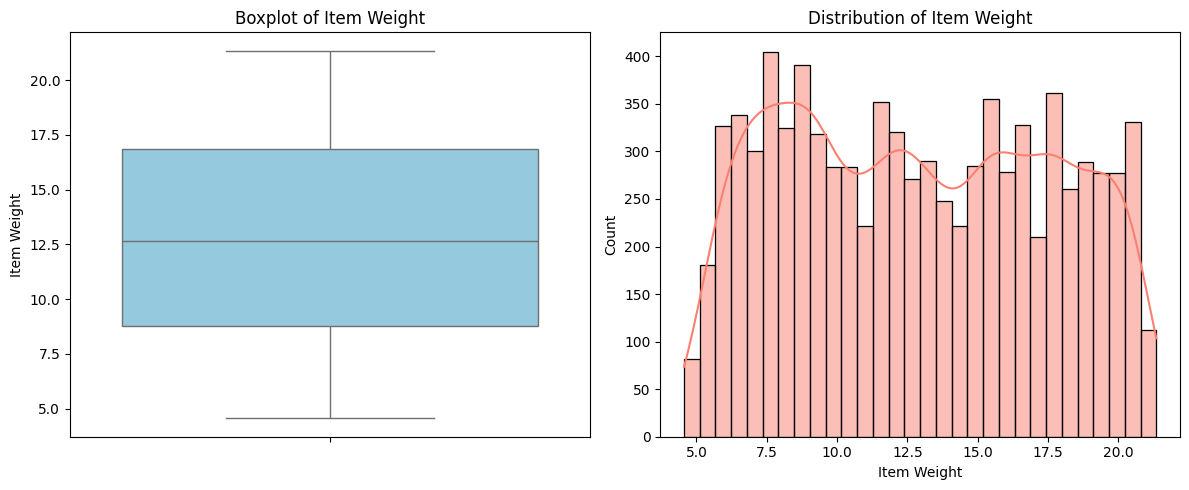

In [60]:
plot_box_hist(df1, 'Item Weight', bins=30, color_box='skyblue', color_hist='salmon')

In [48]:
df1.to_csv('BlinkIT_data.csv', index=False)


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### EDA

In [61]:
df=df1.copy()

In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                8523 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
 12  Outlet Age                 8523 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage:

##### sales distribution

In [22]:
### SALES ANALYSIS

In [63]:
df['Sales'].describe()

count    8523.000000
mean      140.992783
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Sales, dtype: float64

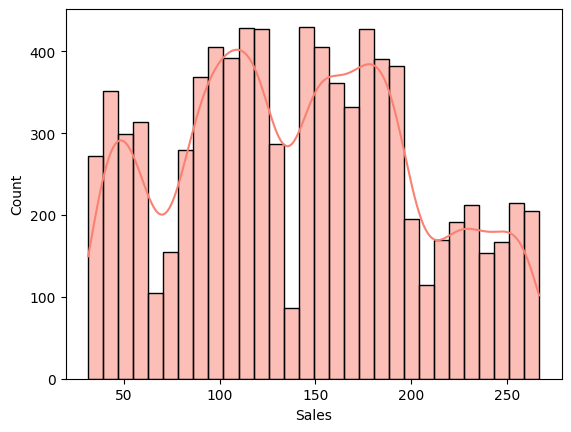

Skewness: 0.127202201702878


In [24]:
sns.histplot(df['Sales'], bins=30, kde=True, color='salmon')
plt.show()
print('Skewness:', df['Sales'].skew())

##### AVERAGE SALES BY ITEN FAT CONTENT

In [25]:
ITEMFATCONTENT=df.groupby('Item Fat Content')['Sales'].mean().reset_index().sort_values(by='Sales',ascending=False)
ITEMFATCONTENT

,Item Fat Content,Sales
1,Regular,141.50426
0,Low Fat,140.71410


In [26]:
fig=px.bar(ITEMFATCONTENT,x='Item Fat Content',y='Sales',color='Item Fat Content',title='Mean Sales by Item Fat Content')
fig.update_layout(xaxis_title='Item Fat Content',yaxis_title='Mean Sales',legend_title='Item Fat Content')
fig.show()

##### ITEM TYPE VS SALES

In [29]:
#AVERAGE SALES BY ITEM TYPE
ITEMTYPEGROUPED=df.groupby('Item Type')['Sales'].mean().reset_index().sort_values(by='Sales', ascending=False)
ITEMTYPEGROUPED.T

,9,4,15,13,6,12,2,1,10,3,5,7,11,14,8,0
Item Type,Household,Dairy,Starchy Foods,Snack Foods,Fruits and Vegetables,Seafood,Breakfast,Breads,Meat,Canned,Frozen Foods,Hard Drinks,Others,Soft Drinks,Health and Hygiene,Baking Goods
Sales,149.424753,148.499211,147.838023,146.194935,144.581235,141.841719,141.788151,140.952669,139.882032,139.763835,138.503366,137.077947,132.85143,131.49251,130.818921,126.380766


In [30]:
fig = px.bar(ITEMTYPEGROUPED,x='Item Type',y='Sales',color='Item Type',title='Average Sales by Item Type',text_auto='.2s')  # Show values on bars

fig.update_layout(xaxis_title='Item Type',
                  yaxis_title='Average Sales',
                  xaxis_tickangle=45,
                  showlegend=False,
                  template='plotly_white')

fig.show()

##### Item Type vs Item Weight

In [67]:
ITEMTYPEWEIGHT = df.groupby('Item Type')['Item Weight'].mean().reset_index().sort_values(by='Item Weight', ascending=False)
ITEMTYPEWEIGHT

,Item Type,Item Weight
11,Others,13.979438
15,Starchy Foods,13.841385
9,Household,13.524780
4,Dairy,13.379905
6,Fruits and Vegetables,13.236713
8,Health and Hygiene,13.052327
13,Snack Foods,13.031230
5,Frozen Foods,12.782404
2,Breakfast,12.779727
10,Meat,12.771212


In [68]:
fig = px.bar(ITEMTYPEWEIGHT,x='Item Type',y='Item Weight',color='Item Type',title='Average weight by Item Type',text_auto='.2s')  # Show values on bars

fig.update_layout(xaxis_title='Item Type',
                  yaxis_title='Average weight',
                  xaxis_tickangle=45,
                  showlegend=False,
                  template='plotly_white')

fig.show()

##### OUTLET TYPE VS SALES

In [69]:
##### AVERAGE SALES BY OUTLET TYPE
OUTLETTYPEGROUPED=df.groupby('Outlet Type')['Sales'].mean().reset_index(name="AverageSales").sort_values(by='AverageSales', ascending=False)
OUTLETTYPEGROUPED

,Outlet Type,AverageSales
2,Supermarket Type2,141.678638
1,Supermarket Type1,141.213895
0,Grocery Store,140.294690
3,Supermarket Type3,139.801791


In [70]:
fig = px.box(df,
             x='Outlet Type',
             y='Sales',
             color='Outlet Type',
             title='Sales Distribution by Outlet Type',
             template='plotly_white')

fig.update_layout(showlegend=False,
                  xaxis_title='Outlet Type',
                  yaxis_title='Sales',
                  xaxis_tickangle=45)

fig.show()

##### OUTLET SIZE VS SALES

In [71]:
#AVERAGE SALES BY OUTLET SIZE
OUTLESIZEGROUPED=df.groupby('Outlet Size')['Sales'].mean().reset_index().sort_values(by='Sales', ascending=False)
OUTLESIZEGROUPED

,Outlet Size,Sales
0,High,142.037414
2,Small,141.699322
1,Medium,139.877647


In [34]:
import plotly.express as px

fig = px.box(df,
             x='Outlet Size',
             y='Sales',
             color='Outlet Size',
             title='Sales Distribution by Outlet Size',
             template='plotly_white')

fig.update_layout(showlegend=False,
                  xaxis_title='Outlet Size',
                  yaxis_title='Sales',
                  xaxis_tickangle=0)

fig.show()


##### OUTLET LOCATION TYPE VS SALES

In [35]:
#AVERAGE SALES BY OUTLET LOCATIO  TYPE
OUTLETLOCATIONTYPEGROUPED=df.groupby('Outlet Location Type')['Sales'].mean().reset_index().sort_values(by='Sales', ascending=False)
OUTLETLOCATIONTYPEGROUPED

,Outlet Location Type,Sales
1,Tier 2,141.167198
2,Tier 3,140.935234
0,Tier 1,140.870106


In [36]:
fig = px.box(df,
             x='Outlet Location Type',
             y='Sales',
             color='Outlet Location Type',
             title='Sales Distribution by Outlet Location Type',
             template='plotly_white')
fig.update_layout(showlegend=False)
fig.show()

##### TOTAL SALES BY OUTLET

In [37]:
OUTLET_SALES=df.groupby('Outlet Identifier')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)
OUTLET_SALES

,Outlet Identifier,Sales
6,OUT035,133103.9070
8,OUT046,132113.3698
1,OUT013,131809.0156
3,OUT018,131477.7764
7,OUT045,130942.7802
5,OUT027,130714.6746
9,OUT049,130476.8598
2,OUT017,129103.9604
0,OUT010,78131.5666
4,OUT019,73807.5824


In [38]:
fig=px.bar(OUTLET_SALES,x='Outlet Identifier',y='Sales',color='Outlet Identifier',title='Total Sales by Outlet Identifier',text_auto='.6s')
fig.update_layout(xaxis_title='Outlet Identifier',yaxis_title='Total Sales',legend_title='Outlet Identifier')
fig.show()

##### PIVOT ANALYSIS

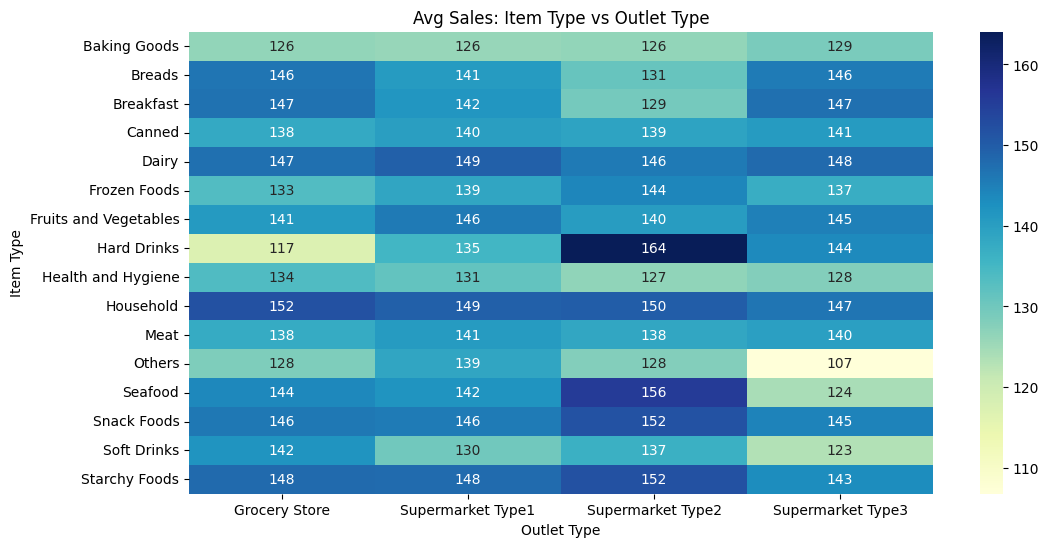

In [39]:
#ITEM TYPE VS OUTLET TYPE
pivot_table = pd.pivot_table(df, values='Sales', 
                             index='Item Type', 
                             columns='Outlet Type', 
                             aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Avg Sales: Item Type vs Outlet Type')
plt.show()


In [40]:
df1=pivot_table.reset_index()
df_melt = df1.melt(id_vars='Item Type', var_name='Outlet Size', value_name='Average Sales')

# Plot with Outlet Size on X-axis and Item Type as color
fig = px.bar(df_melt, 
             x='Outlet Size', 
             y='Average Sales', 
             color='Item Type', 
             barmode='group',
             text='Average Sales',
             title='Average Sales by Outlet Size and Item Type')

fig.update_layout(xaxis_title='Outlet Size', yaxis_title='Average Sales', 
                  legend_title='Item Type',
                  width=1800, height=500)

fig.show()

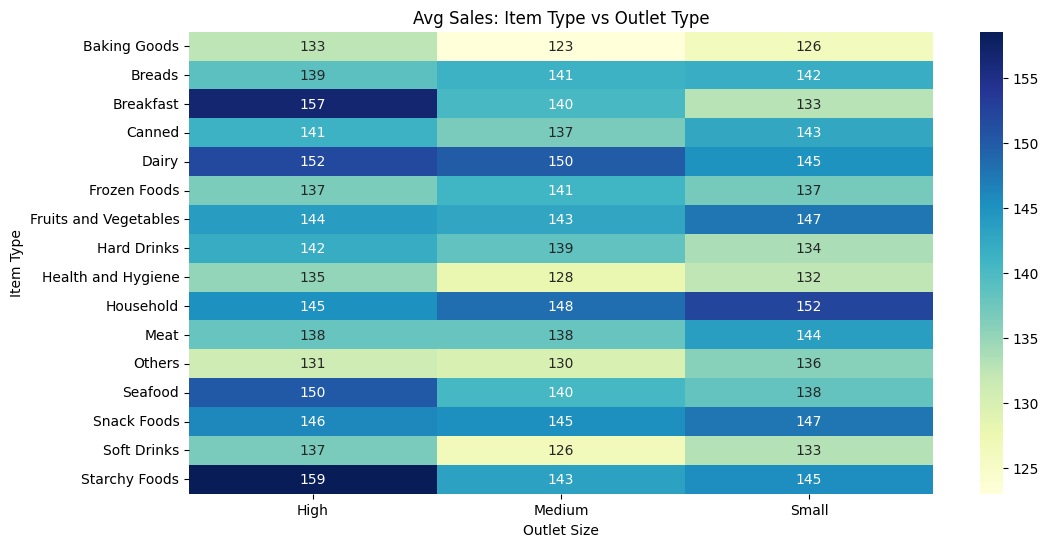

In [41]:
pivot_table1 = pd.pivot_table(df, values='Sales', 
                             index='Item Type', 
                             columns='Outlet Size', 
                             aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table1, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Avg Sales: Item Type vs Outlet Type')
plt.show()

In [42]:
df2=pivot_table1.reset_index()
df_melt = df1.melt(id_vars='Item Type', var_name='Outlet Size', value_name='Average Sales')

# Plot with Outlet Size on X-axis and Item Type as color
fig = px.bar(df_melt, 
             x='Outlet Size', 
             y='Average Sales', 
             color='Item Type', 
             barmode='group',
             text='Average Sales',
             title='Average Sales by Outlet Size and Item Type')

fig.update_layout(xaxis_title='Outlet Size', yaxis_title='Average Sales', 
                  legend_title='Item Type',
                  width=1800, height=500)

fig.show()

#ITEM FAT CONTENT VS OUTLET TYPE

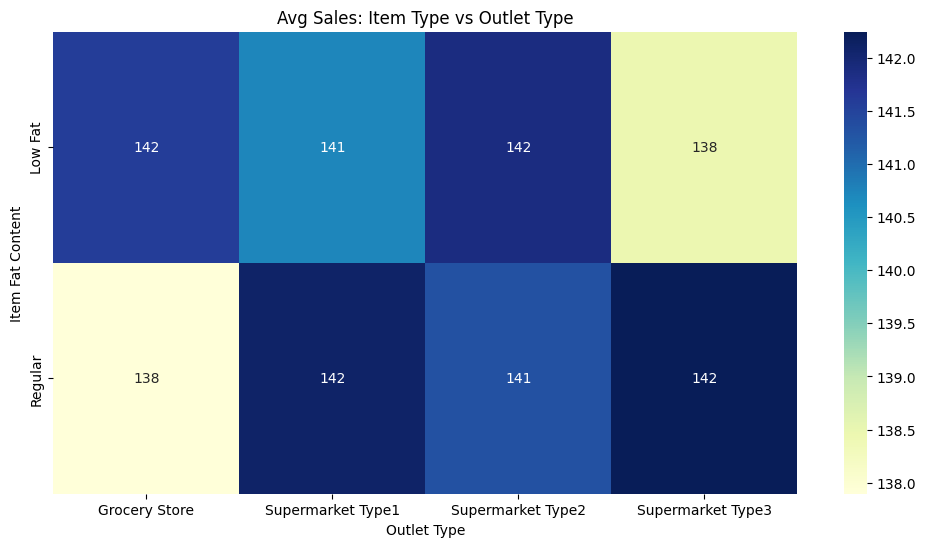

In [43]:
pivot_table1=pd.pivot_table(df,values='Sales',index='Item Fat Content',columns='Outlet Type',aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table1, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Avg Sales: Item Type vs Outlet Type')
plt.show()

In [44]:
df2=pivot_table1.reset_index()
df_melt = df2.melt(id_vars='Item Fat Content', var_name='Outlet Size', value_name='Average Sales')

# Plot with Outlet Size on X-axis and Item Type as color
fig = px.bar(df_melt, 
             x='Outlet Size', 
             y='Average Sales', 
             color='Item Fat Content', 
             barmode='group',
             text='Average Sales',
             title='Average Sales by Outlet Size and Item Type')

fig.update_layout(xaxis_title='Outlet Size', yaxis_title='Average Sales', 
                  legend_title='Item Type',
                  width=1800, height=500)

fig.show()


##### OUTLET RATINGS

In [72]:
RATING=df.groupby('Outlet Identifier')['Rating'].mean().reset_index().sort_values(by='Rating',ascending=False)
RATING

,Outlet Identifier,Rating
4,OUT019,3.995076
9,OUT049,3.985484
2,OUT017,3.981641
0,OUT010,3.977117
3,OUT018,3.971228
7,OUT045,3.959957
8,OUT046,3.958387
5,OUT027,3.952941
1,OUT013,3.949571
6,OUT035,3.944516


In [ ]:
import plotly.express as px

fig = px.scatter(df,
                 x='Rating',
                 y='Sales',
                 color='Outlet Type',
                 title='Sales vs Rating by Outlet Type',
                 template='plotly_white',
                 opacity=0.7)

fig.update_layout(xaxis_title='Rating',
                  yaxis_title='Sales',
                  legend_title='Outlet Type')

fig.show()


##### corelation matrix

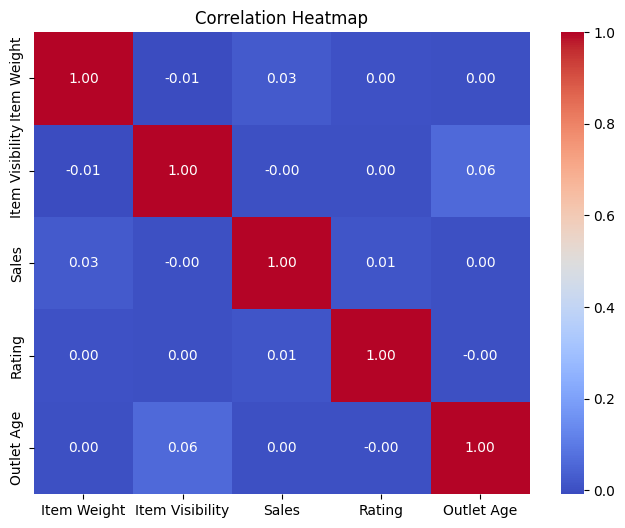

In [46]:
num_cols = ['Item Weight', 'Item Visibility', 'Sales', 'Rating', 'Outlet Age']
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# observations